In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy.stats as sts

%matplotlib inline

1. Загрузить файл auto.csv

In [52]:
data = pd.read_csv('auto.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [33]:
def calc_params(df, name) :
    fd = df[name]
    fd_without_na = fd.dropna()

    mean_ = statistics.mean(fd_without_na)
    median_ = statistics.median(fd)
    mode_ = None
    try :
        mode_ = statistics.mode(fd)
    except statistics.StatisticsError :
        pass
    
    min_ = min(fd)
    max_ = max(fd)
    pstdev_ = statistics.pstdev(fd)
    
    return [mean_, median_, mode_, min_, max_, pstdev_]

columns = ['Среднее', 'Медиана', 'Мода', 'Минимум', 'Максимум', 'Отклонение']
index = []
frame_data = []
calculable_columns = list(data.describe().columns)
for col in calculable_columns :
    index.append(col)
    frame_data.append(calc_params(data, col))

stats_frame = pd.DataFrame(data=frame_data, index=index, columns=columns)
stats_frame


,Среднее,Медиана,Мода,Минимум,Максимум,Отклонение
symboling,0.834146,1.00,0.00,-2.00,3.00,1.242266
normalized-losses,126.365854,122.00,161.00,65.00,256.00,35.351859
wheel-base,98.756585,97.00,94.50,86.60,120.90,6.007070
length,174.049268,173.20,157.30,141.10,208.10,12.307161
width,65.907805,65.50,63.80,60.30,72.30,2.139965
height,53.724878,54.10,50.80,47.80,59.80,2.437555
curb-weight,2555.565854,2414.00,2385.00,1488.00,4066.00,519.408699
engine-size,126.907317,120.00,NaN,61.00,326.00,41.541002
bore,3.324878,3.31,3.62,2.54,3.94,0.272382
stroke,3.253366,3.29,3.40,2.07,4.17,0.313171


3. Рассчитать и визуализировать корреляционную матрицу для переменных

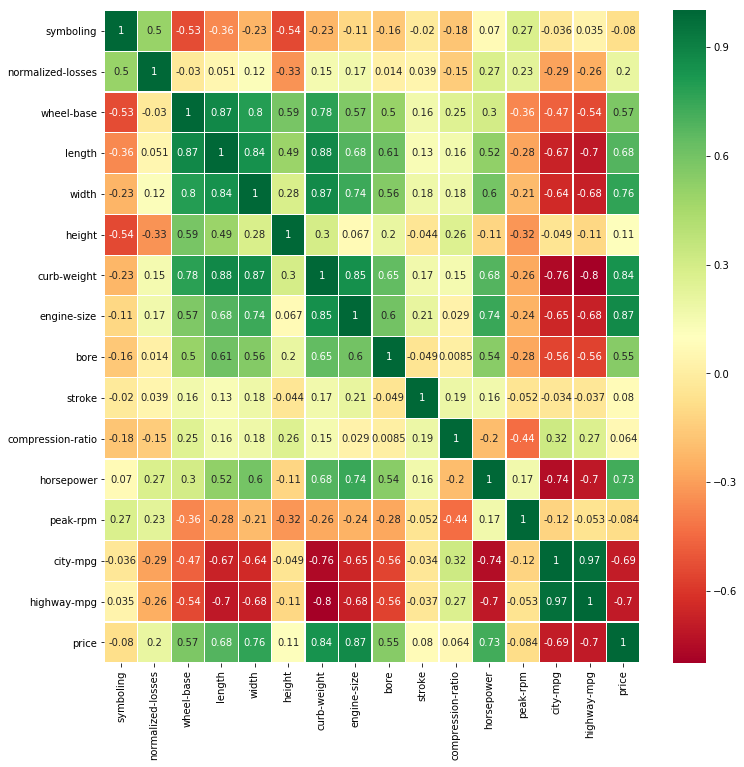

In [60]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

min=5118, max=45400, count=205


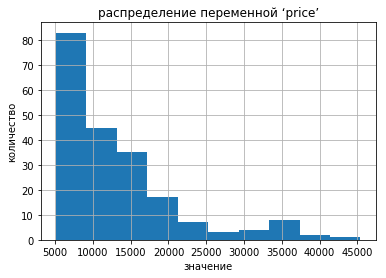

skewness=1.7534486514523662, kurtosis=2.848082544390688


In [58]:
price_series = data['price']
print("min={0}, max={1}, count={2}".format(min(price_series), max(price_series), len(price_series)))
plt.hist(price_series)
plt.xlabel('значение')
plt.ylabel('количество')
plt.title('распределение переменной ‘price’')
plt.grid(True)
plt.show()

skewness = sts.skew(price_series)
kurtosis = sts.kurtosis(price_series)
print("skewness={0}, kurtosis={1}".format(skewness, kurtosis))

5. Визуализировать несколько взаимосвязей между переменными

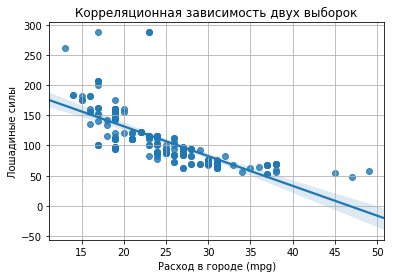

In [66]:
sns.regplot(x = data['city-mpg'], y = data['horsepower'], data = data, fit_reg=True)
plt.xlabel('Расход в городе (mpg)')
plt.ylabel('Лошадиные силы')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(True)
plt.show()

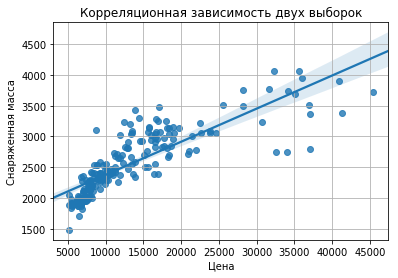

In [67]:
sns.regplot(x = data['price'], y = data['curb-weight'], data = data, fit_reg=True)
plt.xlabel('Цена')
plt.ylabel('Снаряженная масса')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(True)
plt.show()

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

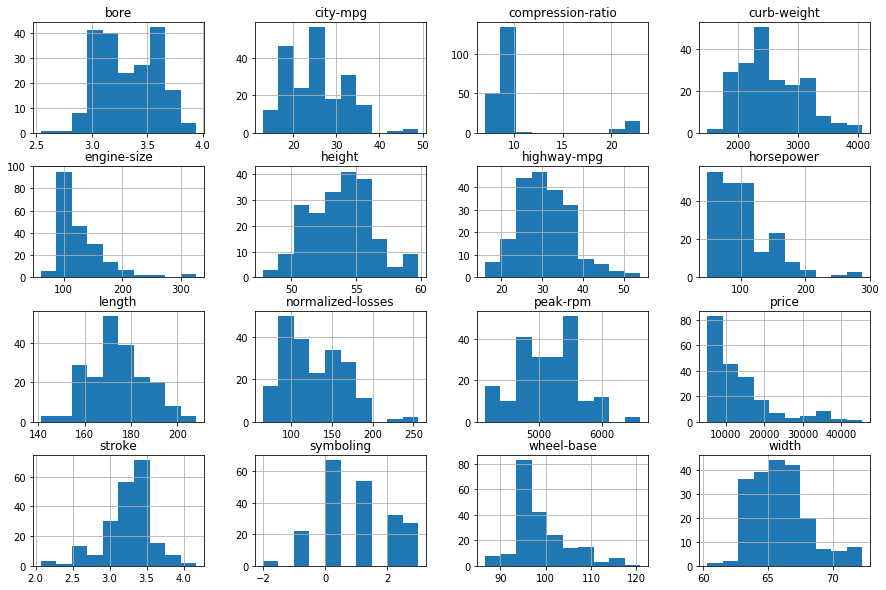

In [71]:
data.hist()
plt.gcf().set_size_inches(15,10)
plt.show()

In [ ]:
# дальше по t-test я поплыл .. нужно доп разъяснение